### MNIST dataset classifiers.  

##### A simple Keras MNIST classifier. 
##### 2.46% validation loss.
##### 99.13% validation accuracy.
##### Training time: 406.1 seconds 

In [30]:
# Imports
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

import time


In [4]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [36]:
batch_size = 128
epochs = 15
start_time = time.time()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch 1/15
422/422 [==============================] - 28s 65ms/step - loss: 0.0316 - accuracy: 0.9895 - val_loss: 0.0250 - val_accuracy: 0.9923
Epoch 2/15
422/422 [==============================] - 27s 64ms/step - loss: 0.0301 - accuracy: 0.9902 - val_loss: 0.0250 - val_accuracy: 0.9928
Epoch 3/15
422/422 [==============================] - 27s 64ms/step - loss: 0.0313 - accuracy: 0.9894 - val_loss: 0.0261 - val_accuracy: 0.9933
Epoch 4/15
422/422 [==============================] - 27s 63ms/step - loss: 0.0288 - accuracy: 0.9902 - val_loss: 0.0254 - val_accuracy: 0.9935
Epoch 5/15
422/422 [==============================] - 27s 64ms/step - loss: 0.0272 - accuracy: 0.9905 - val_loss: 0.0251 - val_accuracy: 0.9923
Epoch 6/15
422/422 [==============================] - 27s 64ms/step - loss: 0.0259 - accuracy: 0.9910 - val_loss: 0.0280 - val_accuracy: 0.9927
Epoch 7/15
422/422 [==============================] - 27s 65ms/step - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.0273 - val_accuracy:

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024618372321128845
Test accuracy: 0.9912999868392944


##### A simple Pytorch model on the same dataset. 
##### 7.03% validation loss. 
##### 97.82% validaton accuracy. 
##### Training time: 211.5 seconds

In [15]:
# Imports
import torch
import torchvision

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [42]:
n_epochs = 10
batch_size_train = 128
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [43]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [44]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [45]:
example_data.shape

torch.Size([1000, 1, 28, 28])

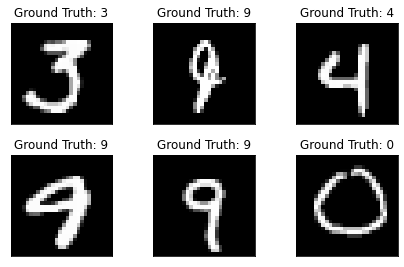

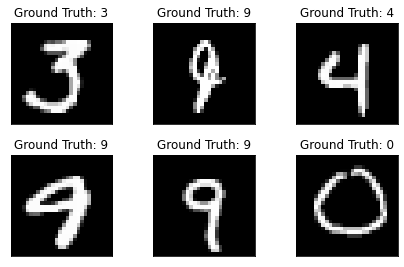

In [46]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [47]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [48]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [49]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [50]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      #torch.save(network.state_dict(), '/results/model.pth')
      #torch.save(optimizer.state_dict(), '/results/optimizer.pth')

In [51]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [52]:
test()
start_time = time.time()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 2.3096, Accuracy: 924/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.308796
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.291139
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.287050
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.254423
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.271532
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.214977
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.230360
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.146518
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.078242
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.050225
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.847659
Train Epoch: 1 [14080/60000 (23%)]	Loss: 1.708431
Train Epoch: 1 [15360/60000 (26%)]	Loss: 1.602313
Train Epoch: 1 [16640/60000 (28%)]	Loss: 1.518241
Train Epoch: 1 [17920/60000 (30%)]	Loss: 1.593494
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.490718
Train Epoch: 1 [20480/60000 (34%)]	Loss: 1.318780
Train Epoch: 1 [21760/60000 (36%)]	Loss: 1.271219
Train Epoch: 1 [23040/60000 (38%)]	Loss: 1.181220
Train Epoc

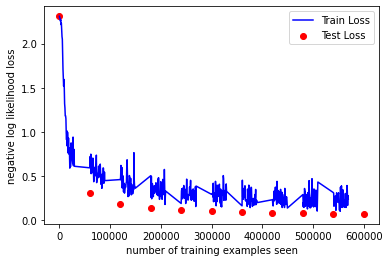

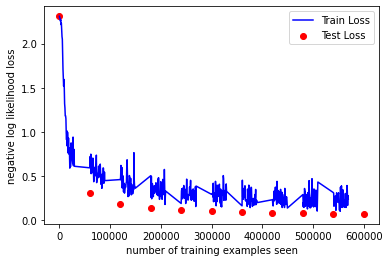

In [54]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [55]:
with torch.no_grad():
  output = network(example_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


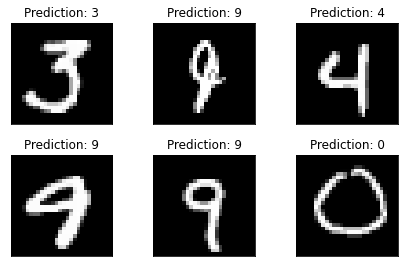

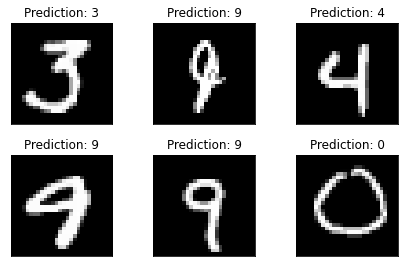

In [56]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig